In [1]:
import json

In [12]:
with open('nsynth-valid.jsonwav/nsynth-valid/examples.json') as f:
    rawData = json.load(f)

In [15]:
pitches = []
for i in range(30):
    pitches.append(rawData[list(rawData.keys())[i]]['pitch'])

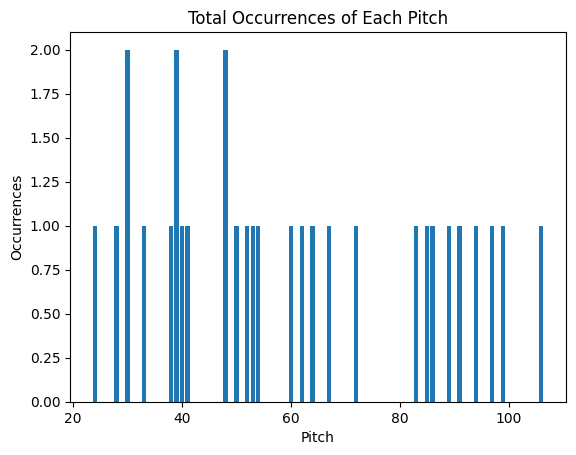

In [18]:
from collections import Counter
import pandas as pd

import matplotlib.pyplot as plt

# Count the occurrences of each pitch
pitch_counts = Counter(pitches)

# Create the plot
plt.bar(pitch_counts.keys(), pitch_counts.values())
plt.xlabel('Pitch')
plt.ylabel('Occurrences')
plt.title('Total Occurrences of Each Pitch')
plt.show()

In [20]:
import pandas as pd

pitchDF = pd.DataFrame(pitches)
print(pitchDF.describe())

                0
count   30.000000
mean    60.066667
std     24.579124
min     24.000000
25%     39.250000
50%     53.500000
75%     84.500000
max    106.000000


<Axes: xlabel='0'>

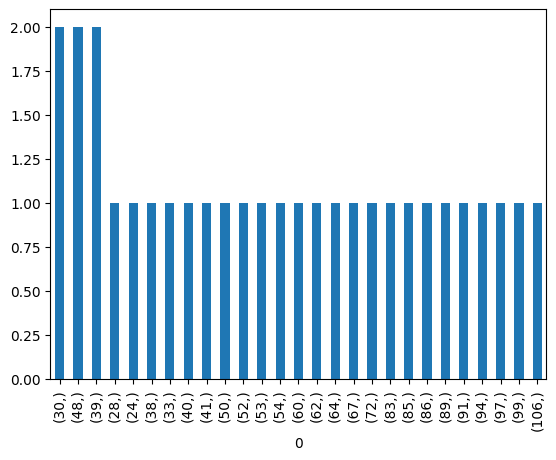

In [21]:
pitchDF.value_counts().plot(kind='bar')

In [22]:
data = []

for d in rawData:
    if (rawData[d]['instrument_family'] in [0, 1, 3, 4, 7, 8] and rawData[d]['instrument_source_str'] == 'acoustic'):
        data.append({"audioFile" : d, "instrument" : rawData[d]['instrument_family'], "note" : rawData[d]['note'], "pitch" : rawData[d]['pitch']})

In [26]:
samePitch = []
for d in data:
    if d['pitch'] == 60:
        samePitch.append(d)
        print(d["audioFile"])

keyboard_acoustic_004-060-025
reed_acoustic_011-060-100
reed_acoustic_018-060-100
string_acoustic_056-060-050
brass_acoustic_015-060-050
string_acoustic_014-060-100
brass_acoustic_015-060-075
string_acoustic_014-060-127
reed_acoustic_037-060-075
guitar_acoustic_021-060-127
reed_acoustic_023-060-050
reed_acoustic_018-060-127
guitar_acoustic_010-060-025
brass_acoustic_046-060-075
guitar_acoustic_021-060-050
guitar_acoustic_014-060-075
brass_acoustic_016-060-025
brass_acoustic_006-060-127
reed_acoustic_023-060-025
string_acoustic_057-060-025
keyboard_acoustic_004-060-050
guitar_acoustic_015-060-100
brass_acoustic_015-060-100
guitar_acoustic_014-060-100
string_acoustic_057-060-075
brass_acoustic_059-060-050
string_acoustic_014-060-075
string_acoustic_014-060-050
brass_acoustic_046-060-050
guitar_acoustic_021-060-075
brass_acoustic_046-060-100
string_acoustic_056-060-025
reed_acoustic_037-060-025
string_acoustic_057-060-050
guitar_acoustic_010-060-075
guitar_acoustic_015-060-127
keyboard_ac

In [28]:
import shutil

for i in range(10):
    shutil.copyfile('./nsynth-valid.jsonwav/nsynth-valid/audio/'+samePitch[i]["audioFile"]+".wav", './samePitch/'+samePitch[i]["audioFile"]+".wav")